In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/chadwambles/supermarket-sales/Product Performance KPIs.sql
/kaggle/input/d/chadwambles/supermarket-sales/Creation Queries.sql
/kaggle/input/d/chadwambles/supermarket-sales/Sales and Revenue KPIs.sql
/kaggle/input/d/chadwambles/supermarket-sales/sales.csv
/kaggle/input/d/chadwambles/supermarket-sales/Customer Behavior KPIs.sql


In [ ]:
os.listdir("/kaggle/input")

In [ ]:
os.listdir("/kaggle/input/d")

In [ ]:
os.listdir("/kaggle/input/d/chadwambles")

In [ ]:
os.listdir("/kaggle/input/d/chadwambles/supermarket-sales")

In [ ]:
df = pd.read_csv("/kaggle/input/d/chadwambles/supermarket-sales/sales.csv")

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df = df.dropna()

In [ ]:
sum = df['total_price'].sum()
print(sum)

In [ ]:
city_group = df.groupby('city').sum()
print(city_group)

In [ ]:
print(df)

In [ ]:
print("Average Unit Price:", df['unit_price'].mean())
print("Total Tax Collected:", df['tax'].sum())


Top market

In [ ]:
top_product = df.groupby('product_name')['total_price'].sum().sort_values(ascending=True)
print("Top Product = ",top_product)

In [ ]:
top_category = df.groupby('product_category')['total_price'].sum().sort_values(ascending=True)
print("Top Category = ",top_category)

In [ ]:
top_city= df.groupby('city')['total_price'].sum().sort_values(ascending=True)
print("Top City =",top_city)

In [ ]:
avg_quantity= df.groupby('product_category')['quantity'].mean().sort_values()
print(avg_quantity)

In [ ]:
branch_sales = df.groupby('branch')['total_price'].sum()
gender_sales = df.groupby('gender')['total_price'].sum()

Average sale of customer

In [ ]:
avg_customer_sale = df.groupby('customer_type')['total_price'].sum().sort_values()
print("Average Customer Sale",avg_customer_sale)

In [ ]:
top_category.plot(kind='bar', color='skyblue', figsize=(8,4))
plt.title("Total Sales by Product Category")
plt.ylabel("Sales")
plt.xlabel("Category")
plt.show()

In [ ]:
branch_sales.plot(kind='bar', color='lightgreen', figsize=(6,4))
plt.title("Total Sales by Branch")
plt.show()

In [ ]:
gender_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(5,5))
plt.title("Sales Distribution by Gender")
plt.ylabel('')
plt.show()

In [ ]:
top_product.plot(kind='pie', autopct='%1.1f%%', figsize=(5,5))
plt.title("Top Procust Sale")
plt.ylabel('')
plt.show()

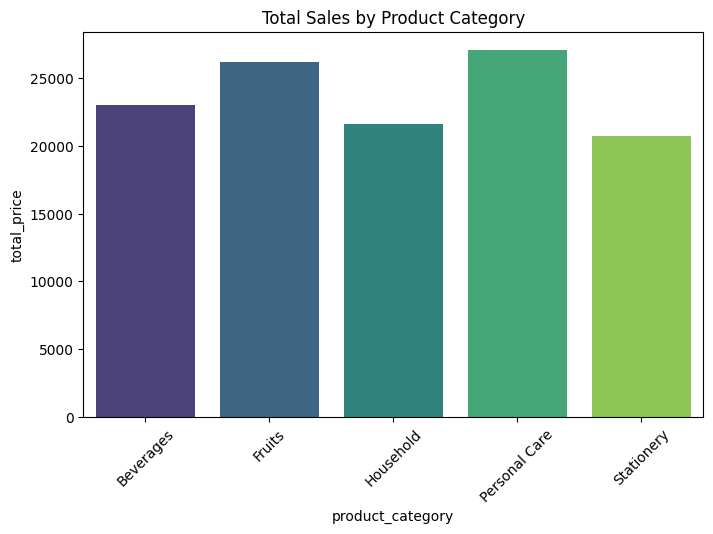

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Group data
category_sales = df.groupby('product_category')['total_price'].sum().reset_index()

# Step 2: Plot
plt.figure(figsize=(8,5))
sns.barplot(data=category_sales, x='product_category', y='total_price', palette='viridis')
plt.title('Total Sales by Product Category')
plt.xticks(rotation=45)
plt.show()


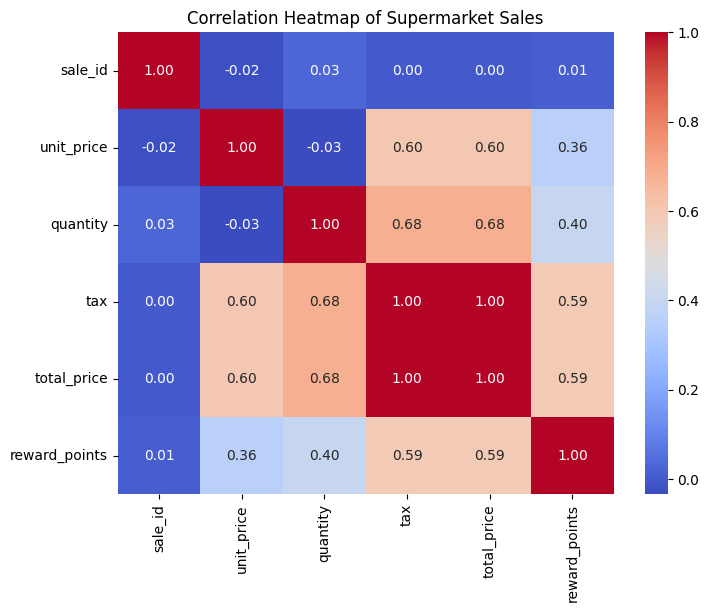

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Supermarket Sales')
plt.show()
